The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

ATMs can recognize handwritten bank checks
Evernote can recognize handwritten task lists
Expensify can recognize handwritten receipts
But how do they do it?

In this project, you will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

# Handwriting Recognition using K-Means

From sklearn library, import the datasets module.

Then, load in the digits data using .load_digits() and print digits.

inspect the data

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

digits=datasets.load_digits()
print(digits.DESCR)
print(digits.data)
print(digits.target)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

To visualize the data images, we need to use Matplotlib. Let’s visualize the image at index 100:

<Figure size 432x288 with 0 Axes>

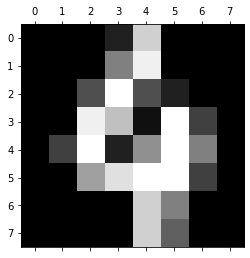

In [3]:
plt.gray() 
plt.matshow(digits.images[100])
 
plt.show()

Is it a 4? Let’s print out the target label at index 100 to find out!

In [4]:
print(digits.target[100])

4


Now we understand what we are working with. Let’s cluster the 1797 different digit images into groups.

Import KMeans from sklearn.cluster

Use the .fit() method to fit the digits.data to the model.

In [5]:
model=KMeans(n_clusters=10,random_state=42)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

Let’s visualize all the centroids! Because data samples live in a 64-dimensional space, the centroids have values so they can be images!

<function matplotlib.pyplot.show(close=None, block=None)>

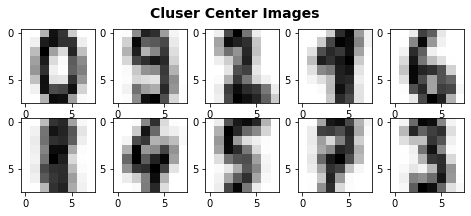

In [7]:
fig=plt.figure(figsize=(8,3))
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

for i in range(10):
  ax = fig.add_subplot(2, 5, 1 + i)
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show

Back in script.py, create a new variable named new_samples
Use the .predict() function to predict new labels for these four new digits. Store those predictions in a variable named new_labels.

But wait, because this is a clustering algorithm, we don’t know which label is which.By looking at the cluster centers, let’s map out each of the labels with the digits we think it represents:

In [8]:
new_samples=np.array([
[0.00,0.08,3.66,6.02,4.50,0.00,0.00,0.00,0.00,1.29,7.62,6.63,7.62,1.30,0.00,0.00,0.00,0.00,1.30,2.29,7.62,1.53,0.00,0.00,0.00,0.00,0.00,4.57,7.47,0.69,0.00,0.00,0.00,0.00,3.12,7.63,4.35,0.00,0.00,0.00,0.00,4.42,7.63,7.62,5.03,1.37,0.00,0.00,0.00,5.49,6.10,6.10,6.10,2.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.08,3.51,3.58,0.69,0.00,0.00,0.00,1.38,6.79,7.62,7.62,6.48,0.61,0.00,0.00,4.96,7.24,2.59,2.51,7.63,3.89,0.00,0.00,5.34,6.10,0.00,0.00,6.25,5.34,0.00,0.00,5.34,6.48,0.08,1.15,7.39,4.42,0.00,0.00,3.90,7.62,6.56,6.86,7.09,0.99,0.00,0.00,0.00,3.06,5.11,5.26,1.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.08,2.67,5.64,2.14,0.00,0.00,0.00,1.29,5.95,7.62,6.56,1.37,0.00,0.00,0.99,7.17,7.17,2.98,0.08,0.00,0.00,0.00,4.65,7.62,6.25,4.73,2.29,0.00,0.00,0.00,5.34,7.09,5.57,7.02,7.55,3.74,0.00,0.00,4.27,7.55,2.14,0.23,5.87,6.79,0.00,0.00,0.53,6.48,7.47,4.96,6.48,6.63,0.00,0.00,0.00,0.69,4.73,6.10,6.10,2.14,0.00,0.00],
[0.00,0.00,0.00,0.15,0.53,0.00,0.00,0.00,0.00,0.00,1.53,6.40,7.47,6.63,3.59,0.00,0.00,0.31,7.09,6.94,3.51,5.95,7.62,0.77,0.00,2.13,7.62,2.14,0.00,1.75,7.62,2.22,0.00,2.29,7.62,1.53,0.00,2.06,7.62,1.99,0.00,2.29,7.62,3.51,1.52,3.96,7.62,1.00,0.00,0.61,6.55,7.62,7.62,7.62,6.79,0.23,0.00,0.00,0.08,1.45,1.52,1.52,0.46,0.00]
])


new_labels=model.predict(new_samples)

for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

8450